Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

Loading the Data

--We will read all of our data from all_data.csv into a Dataframe called df. 
-- We will also do a quick inspection of the DataFrame using the method .head() to check its contents 

In [11]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Loading in our GDP data, as well as exploring the data
data = pd.read_csv("all_data.csv")

data.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Another way to check the shape of our dataframe data is to use the shape function to see how many observations(rows) and columns(fields) there are 

In [4]:
data.shape

(96, 4)

How many countries are represented in the data DataFrame? 
How many years are represented in the data DataFrame?

In [5]:
print(data.Country.unique())
data.Year.unique()

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [18]:
#renaming col "Life expectancy at birth (years)" as the name is a bit lengthy
data = data.rename(columns = {
    "Life expectancy at birth (years)": "Life Expectancy"
})

print(data.head(5))

  Country  Year  Life Expectancy           GDP
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


Text(0.5, 6.79999999999999, 'GDP in Trillions (US Dollars)')

<Figure size 576x432 with 0 Axes>

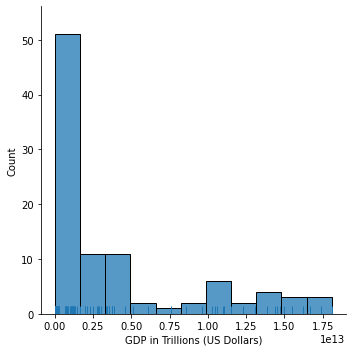

In [19]:
plt.figure(figsize = (8,6))
sns.displot(data.GDP, rug = True, kde = False)
plt.xlabel("GDP in Trillions (US Dollars)")

Text(0.5, 6.79999999999999, 'Life Expectancy at birth (years)')

<Figure size 576x432 with 0 Axes>

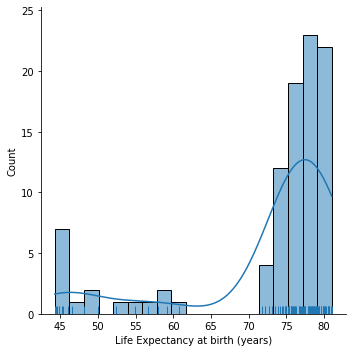

In [21]:
plt.figure(figsize = (8,6))
sns.displot(data["Life Expectancy"], rug = True, kde = True)
plt.xlabel("Life Expectancy at birth (years)")

Lets break down the data by countries that we can see the average Life Expectancy at Birth Year (LEABY) and GDP

In [22]:
#we will drop the Year column as it does not contribute to the LEABY or GDP in this scenario
dataMeans = data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
dataMeans

,Country,Life Expectancy,GDP
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


We will not plt the Life Expectancy in all of the countries

Text(0.5, 0, 'Life expectancy at birth (years)')

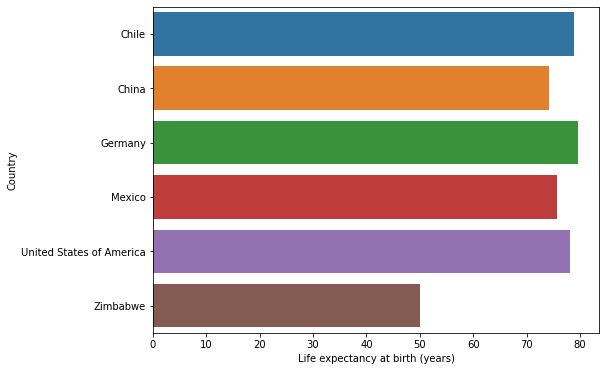

In [23]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Life Expectancy", y = "Country", data=dataMeans)
plt.xlabel("Life expectancy at birth (years)")

Plot the GDP (mean) of all countries 

Text(0.5, 0, 'Life expectancy at birth (years)')

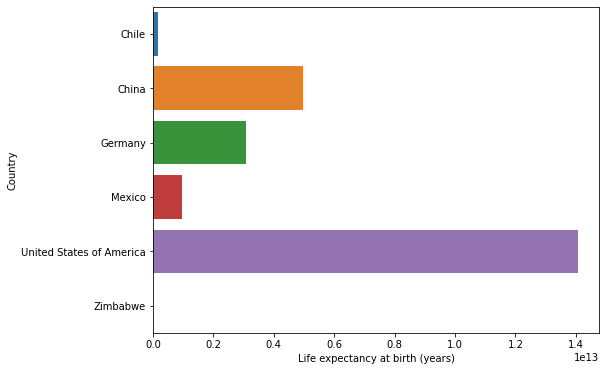

In [24]:
plt.figure(figsize = (8,6))
sns.barplot(x = "GDP", y = "Country", data=dataMeans)
plt.xlabel("Life expectancy at birth (years)")

We can also use Violin Plots to visualize the distribution of both Life expectancy and GDP; 

This plot type allows us to see patterns in the shapes provided. thicker areas on the side of the IQR, represented by the thick gray line in the middle of each column, represent higher probabilities, whereas thinner areas represent lower probability

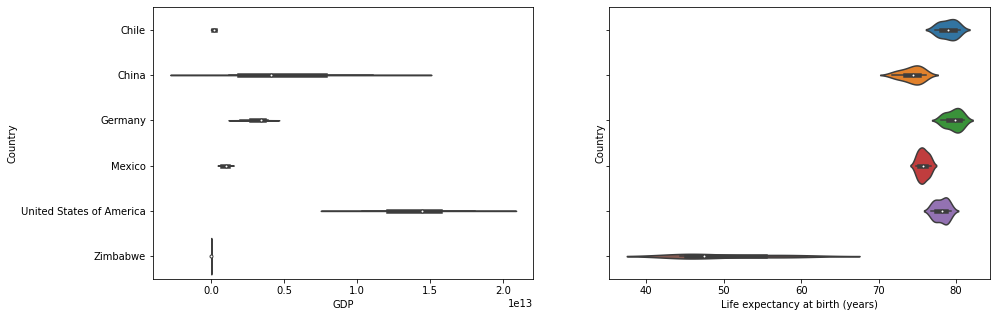

In [37]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0]= sns.violinplot(ax = axes[0], x = data.GDP, y = data.Country)
axes[1]= sns.violinplot(ax = axes[1], x = data["Life Expectancy"], y = data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

In the `GDP` plot on the left, China and the US have a relatively wide range, where Zimbabwe, Chile, and Mexico have shorter ranges. 

In the `LEABY` plot, many of the countries have shorter ranges except for Zimbabwe which has a range spanning from the high 30s to the high 60s.

# # Swarm Plots

Swarm plots are useful because they show dot density around the values as well as distribution through area/shape. 

In the case of of the `GDP` plot on the left, Chile and Zimbabwe have a vertical line of dots that illustrate the
number of data points that fall around their values. This detail would have been lost in the box plot, unless the reader is very adept at data visualizations. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


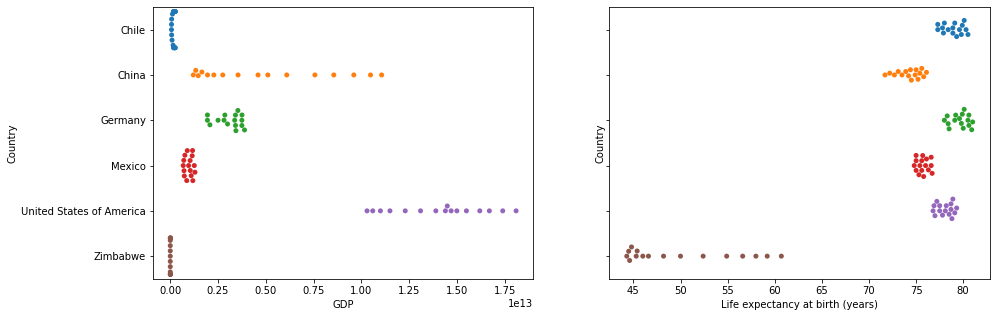

In [38]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0]= sns.swarmplot(ax = axes[0], x = data.GDP, y = data.Country)
axes[1]= sns.swarmplot(ax = axes[1], x = data["Life Expectancy"], y = data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

We can overlay our swarmplots over a violinplots in order to complement our findings and provide more insight to our readers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


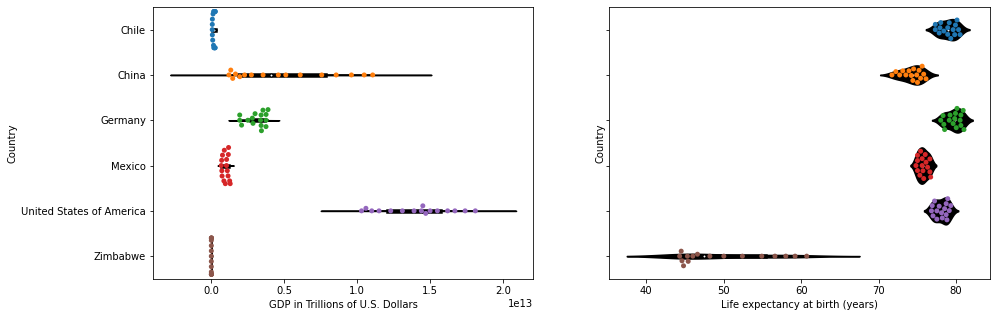

In [43]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=data.GDP, y=data.Country,color = "black")
axes[0] = sns.swarmplot(ax=axes[0], x=data.GDP, y=data.Country)
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax=axes[1], x=data["Life Expectancy"], y=data.Country, color = "black")
axes[1] = sns.swarmplot(ax=axes[1], x=data["Life Expectancy"], y=data.Country)
axes[1].set_xlabel("Life expectancy at birth (years)");

## Line Charts
We will explore GDP and LEABY over the years thru the use of line charts


Text(0, 0.5, 'GDP in Trillions of US Dollars')

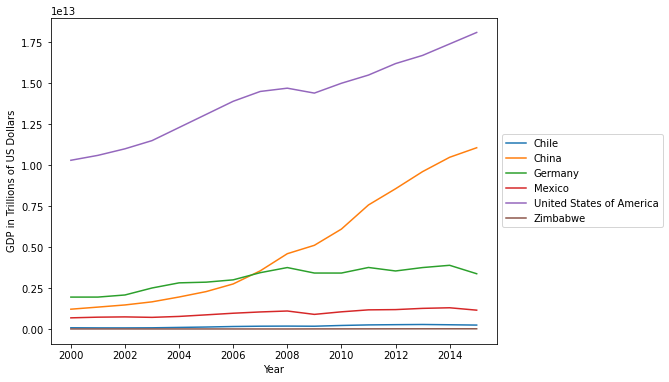

In [46]:
plt.figure(figsize = (8,6))
sns.lineplot(x = data.Year, y = data.GDP, hue = data.Country)
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel("GDP in Trillions of US Dollars")

Plotting each country indvidually, because the graph above above scales all countries' GDP on the same scale; making it seem as though there is hardly any increases for all countries GDP aside from the US and China.

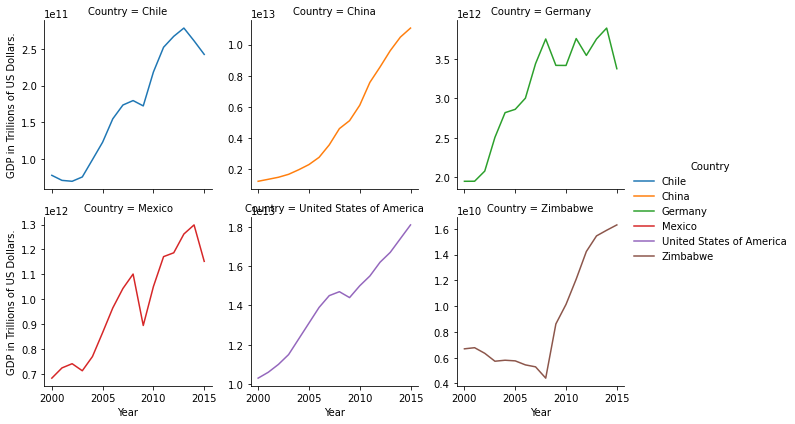

In [51]:
graphGDP = sns.FacetGrid(data, col = "Country", col_wrap = 3, 
                        hue = "Country", sharey = False)
graphGDP = graphGDP.map(sns.lineplot, "Year", "GDP").add_legend().set_axis_labels("Year", "GDP in Trillions of US Dollars.")

graphGDP;

Looking at the life expectancy over the years for the countries in our data DataFrame

Text(0, 0.5, 'Life expectancy at birth (years)')

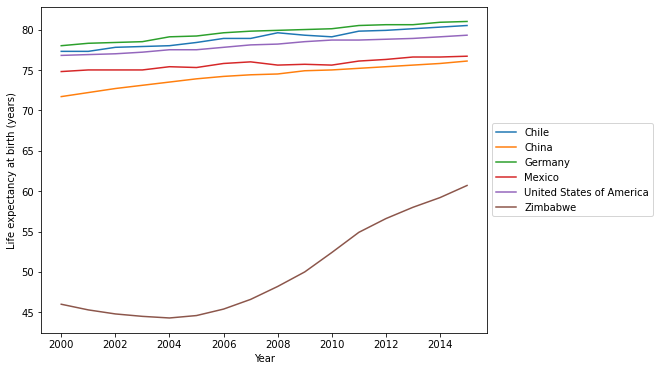

In [52]:
plt.figure(figsize = (8,6))
sns.lineplot(x = data.Year, y = data["Life Expectancy"], hue = data.Country)
plt.legend(loc = "center left", bbox_to_anchor = (1, 0.5), ncol = 1)
plt.ylabel("Life expectancy at birth (years)")

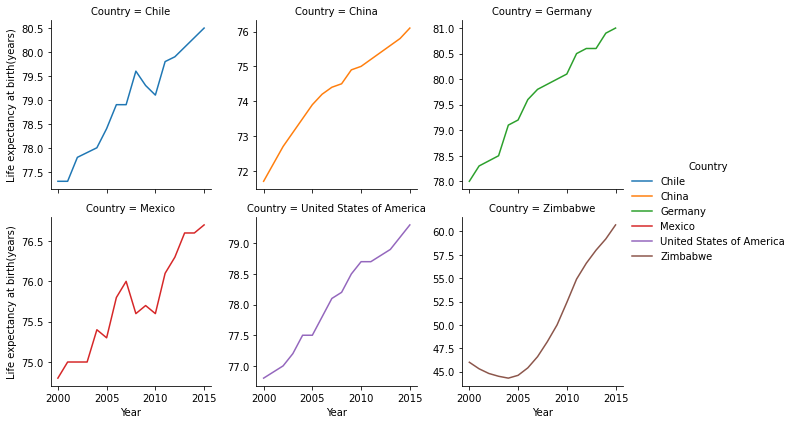

In [55]:
graphLEABY = sns.FacetGrid(data, col = "Country", col_wrap = 3, 
                          hue = "Country", sharey = False)
graphLEABY = (graphLEABY.map(sns.lineplot, "Year", "Life Expectancy")
    .add_legend()
    .set_axis_labels("Year", "Life expectancy at birth(years)"))
graphLEABY

# Scatter Plot

We will now explore the relationship between GDP and LEABY


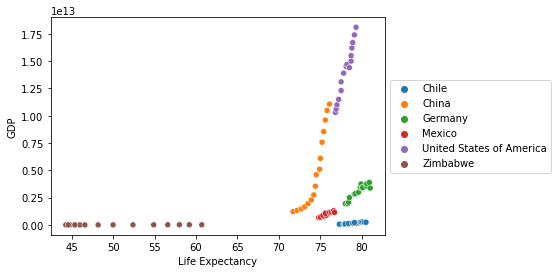

In [61]:
sns.scatterplot(x = data["Life Expectancy"], y = data.GDP, hue = data.Country).legend(loc = "center left", bbox_to_anchor = (1, 0.5), ncol = 1);

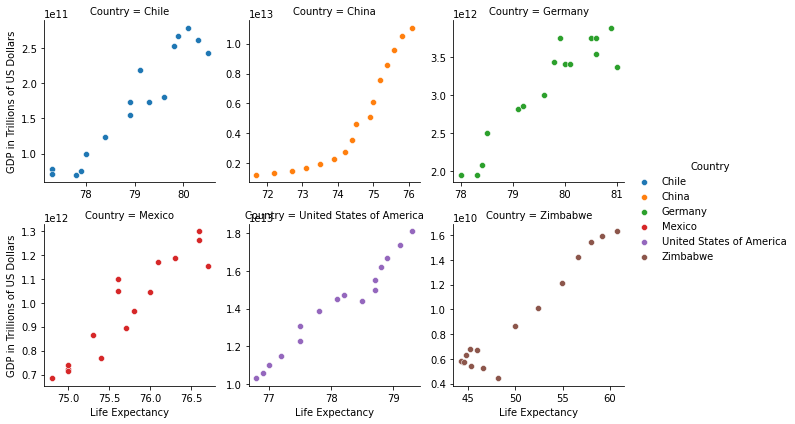

In [65]:
scatter = sns.FacetGrid(data, col="Country", col_wrap = 3, 
                       hue = "Country", sharey = False, sharex = False)
scatter = (scatter.map(sns.scatterplot, "Life Expectancy", "GDP").add_legend()
              .set_axis_labels("Life Expectancy", "GDP in Trillions of US Dollars"))

Looking at the countries GDP vs LEABY broken down into indivdual scatterplots, we can see that there seems to be a positive correlation between GDP and life expectancy. It seems that when there is an increase in GDP, there is also an increase in Life expectancy

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

The project was also able to answer some of the questions posed in the beginning:

- Has life expectancy increased over time in the six nations?
    - Yes with Zimbabwe having the greatest increase.
- Has GDP increased over time in the six nations?
    - GDP has also increased for all countries in our list, especially for China.
- Is there a correlation between GDP and life expectancy of a country?
    - Yes there is a positive correlation between GDP and life expectancy for countries in our list.
- What is the average life expectancy in these nations?
    - Average life expectancy was between mid to high 70s for the countries except for Zimbabwe which was 50.
- What is the distribution of that life expectancy?
    - the life expectancy had a left skew, or most of the observations were on the right side.